Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Titanic_Data_Set/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Survived = Survival， 0 = No, 1 = Yes
# pclass = Ticket class， 1 = 1st, 2 = 2nd, 3 = 3rd, 1st = Upper, 2nd = Middle, 3rd = Lower
# sibsp = # of siblings / spouses aboard the Titanic
# parch = # of parents / children aboard the Titanic
# cabin = Cabin number

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Deal With NaN Data

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
df["Age"] = df["Age"].fillna(0)

In [9]:
df["Cabin"] = df["Cabin"].fillna('NA')

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# Since we have no idea about the NaN data in the column 'Embarked', it is better to fill with the most popular data.
df["Embarked"] = df["Embarked"].fillna('S')

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Data Editing

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df['Survived'] = df['Survived'].replace([1], 'Survived')
df['Survived'] = df['Survived'].replace([0], 'Passed_Away')

In [16]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Passed_Away,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,Passed_Away,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S


In [18]:
# It is good to know how many passengers survived.
df['Survived'].value_counts()

Passed_Away    549
Survived       342
Name: Survived, dtype: int64

<AxesSubplot:>

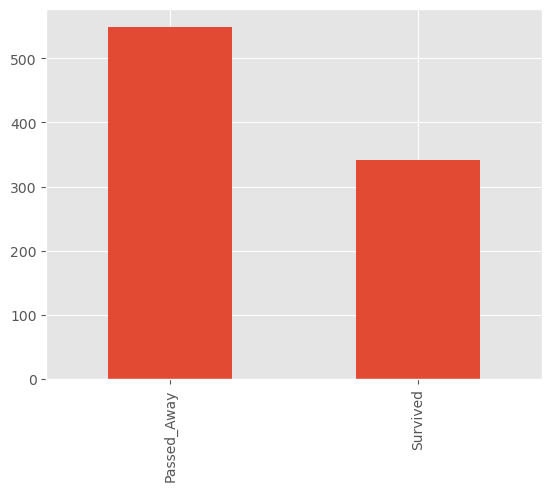

In [19]:
df['Survived'].value_counts()\
.plot(kind='bar')

Text(0, 0.5, '')

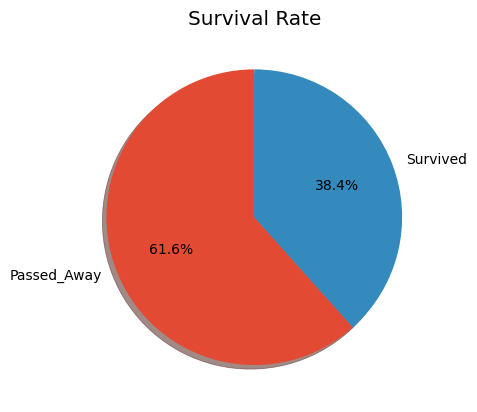

In [20]:
# Also, I want to know the survival rate.
ax = df['Survived'].value_counts()\
.plot(kind = 'pie', autopct='%1.1f%%', shadow=True, startangle=90, title ="Survival Rate")
ax.set_ylabel('')

Extracting parts of the dataframe

In [21]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Passed_Away,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
# I want to know the relationship between pclass and the survival rate.
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
df.groupby(['Pclass'])['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

Text(0, 0.5, '')

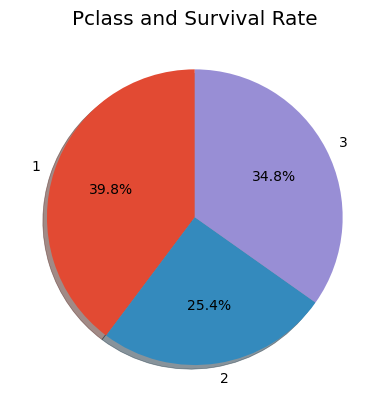

In [35]:
ax = df.groupby(['Pclass']).apply(lambda x: x[x['Survived'] == 'Survived' ]['Survived'].count())\
.plot(kind = 'pie', autopct='%1.1f%%', shadow=True, startangle=90, title ="Pclass and Survival Rate")
ax.set_ylabel('')

In [36]:
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Text(0, 0.5, 'Fare')

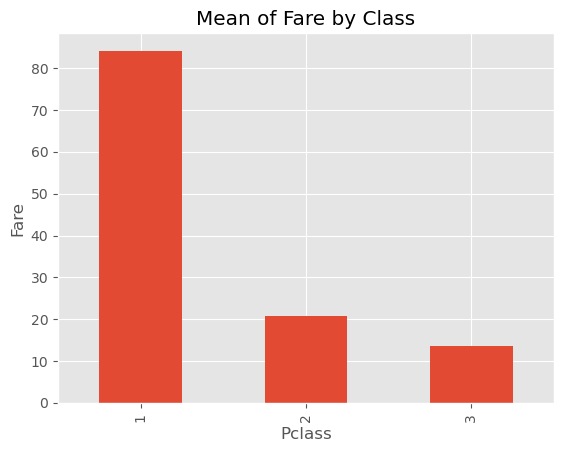

In [37]:
ax = df.groupby(['Pclass'])['Fare'].mean()\
.plot(kind='bar', title='Mean of Fare by Class')
      
ax.set_xlabel('Pclass')
ax.set_ylabel('Fare')

Alterations on the dataframe

In [38]:
# Add a new column
df['total fare paid by family'] = (df['SibSp'] + df['Parch'] + 1) * df['Fare']
df['Family Size'] = (df['SibSp'] + df['Parch'] + 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,total fare paid by family,Family Size
0,1,Passed_Away,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,14.5000,2
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,142.5666,2
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,7.9250,1
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,106.2000,2
4,5,Passed_Away,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,8.0500,1


In [39]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,total fare paid by family,Family Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,23.799293,0.523008,0.381594,32.204208,78.726431,1.904602
std,257.353842,0.836071,17.596074,1.102743,0.806057,49.693429,166.035816,1.613459
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,2.000000,6.000000,0.000000,0.000000,7.910400,7.977100,1.000000
50%,446.000000,3.000000,24.000000,0.000000,0.000000,14.454200,24.950000,1.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,78.375000,2.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1578.000000,11.000000


Text(0, 0.5, 'Count')

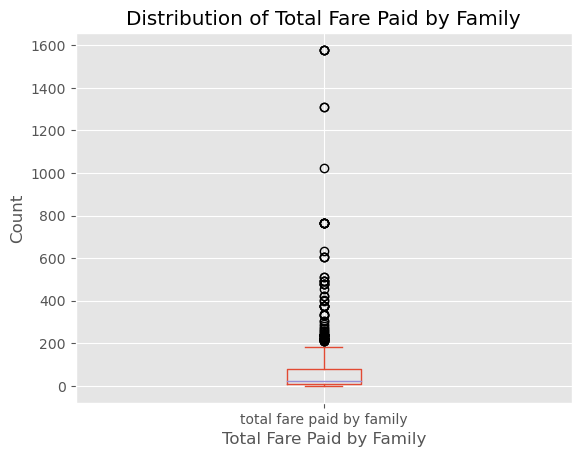

In [40]:
# Let's see the Distribution of Total Fare Paid by Family
ax = df['total fare paid by family']\
.plot(kind='box', title='Distribution of Total Fare Paid by Family')
ax.set_xlabel('Total Fare Paid by Family')
ax.set_ylabel('Count')

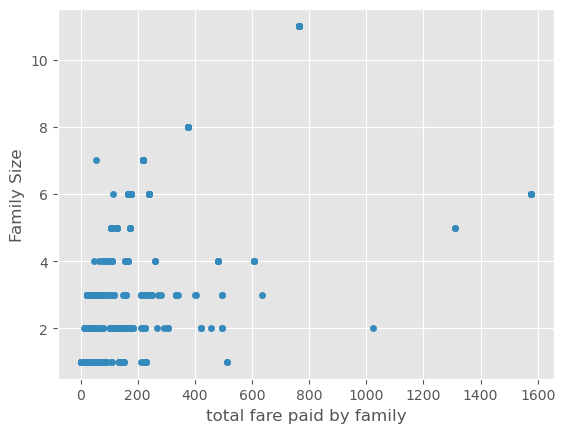

In [41]:
# In fact, the family size is no related to the total fare.
df.plot(kind='scatter',
        x='total fare paid by family',
        y= 'Family Size',
       title='') 
plt.show()